In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, balanced_accuracy_score, ConfusionMatrixDisplay  # noqa: E402
from scipy.stats import randint
import jax.numpy as jnp
import jax
#sns.set_style("darkgrid")
sns.set_style("dark")

In [2]:
def important_metrics(model, X, y):
    # Predict the labels for the given data
    y_pred = model.predict(X)

    _confusion_matrix = confusion_matrix(y, y_pred)
    # Calculate confusion matrix
    tn, fp, fn, tp = _confusion_matrix.ravel()

    # Calculate metrics
    sensitivity = recall_score(y, y_pred)
    specificity = tn / (tn + fp)
    precision = precision_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    balanced_accuracy = balanced_accuracy_score(y, y_pred)

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=_confusion_matrix, display_labels=model.classes_)
    disp.plot()
    plt.show()

    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1}")
    print(f"Balanced Accuracy: {balanced_accuracy}")

    return None

In [3]:
def grid_search_optimization(X_training, X_test, Y_training, Y_test):
    # Model
    model = DecisionTreeClassifier(random_state=42)

    # Hiperparametry do przeszukania
    param_grid = {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': range(2,10),
        'min_samples_split': range(2,10),
        'min_samples_leaf': range(1,10)
    }

    # Grid Search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_training, Y_training)

    # Najlepsze parametry
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Metryki
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(Y_test, y_pred)

    tn, fp, fn, tp = cm.ravel()

    sensitivity = recall_score(Y_test, y_pred)
    specificity = tn / (tn + fp)
    precision = precision_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(Y_test, y_pred)

    metrics = {
        'sensitivity': sensitivity,
        'specificity': specificity,
        'precision': precision,
        'f1_score': f1,
        'balanced_accuracy': balanced_accuracy
    }

    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
    cm_display.plot()
    plt.show()

    return best_params, grid_search.best_score_, metrics

In [4]:
def random_search_optimization(X_training, X_test, Y_training, Y_test):
    # Model
    model = DecisionTreeClassifier(random_state=42)

    # Hiperparametry do przeszukania
    param_dist = {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': range(2,10),
        'min_samples_split': range(2,10),
        'min_samples_leaf': range(1,10)
    }

    # Random Search
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
    random_search.fit(X_training, Y_training)

    # Najlepsze parametry
    best_params = random_search.best_params_
    best_model = random_search.best_estimator_

    # Metryki
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(Y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    sensitivity = recall_score(Y_test, y_pred)
    specificity = tn / (tn + fp)
    precision = precision_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(Y_test, y_pred)

    metrics = {
        'sensitivity': sensitivity,
        'specificity': specificity,
        'precision': precision,
        'f1_score': f1,
        'balanced_accuracy': balanced_accuracy
    }

    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
    cm_display.plot()
    plt.show()

    return best_params, random_search.best_score_, metrics

In [19]:
from skopt import BayesSearchCV

def bayesian_optimization(X_training, X_test, Y_training, Y_test):
    # Model
    model = DecisionTreeClassifier(random_state=42)

    # Hyperparameters to search
    param_space = {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': list(range(2,10)),
        'min_samples_split': list(range(2,10)),
        'min_samples_leaf': list(range(1,10))
    }

    # Bayesian Search
    bayes_search = BayesSearchCV(estimator=model, search_spaces=param_space, n_iter=100, cv=5, scoring='accuracy', random_state=42)
    bayes_search.fit(X_training, Y_training)

    # Best parameters
    best_params = bayes_search.best_params_
    best_model = bayes_search.best_estimator_

    # Metrics
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(Y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    sensitivity = recall_score(Y_test, y_pred)
    specificity = tn / (tn + fp)
    precision = precision_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(Y_test, y_pred)

    metrics = {
        'sensitivity': sensitivity,
        'specificity': specificity,
        'precision': precision,
        'f1_score': f1,
        'balanced_accuracy': balanced_accuracy
    }

    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
    cm_display.plot()
    plt.show()

    return best_params, bayes_search.best_score_, metrics

# Klasyfikacja

In [6]:
dt = pl.read_excel("ftalany_klasyfikacja.xlsx")
X_training = pl.read_excel("ftalany_klasyfikacja.xlsx", sheet_name="X_train")
X_test = pl.read_excel("ftalany_klasyfikacja.xlsx", sheet_name="X_test")
Y_training = pl.read_excel("ftalany_klasyfikacja.xlsx", sheet_name="y_train")
Y_test = pl.read_excel("ftalany_klasyfikacja.xlsx", sheet_name="y_test")

Macierz korelacji pomiędzy zmiennymi niezależnymi i zmienną zależną

In [7]:
dt[:,1:6].to_pandas().corrwith(dt[:,6].to_pandas())

E HOMO     0.892842
qc-        0.891868
logSOM    -0.718056
ph         0.777599
EHOMO-1    0.638491
dtype: float64

In [8]:
X_training.to_pandas().corrwith(Y_training.to_pandas()['logk obs'])

E HOMO    -0.740826
qc-       -0.795764
logSOM     0.717356
ph        -0.792809
EHOMO-1   -0.245796
dtype: float64

In [9]:
X_test.to_pandas().corrwith(Y_test.to_pandas()['logk obs'])

E HOMO    -0.414176
qc-       -0.553332
logSOM     0.248135
ph        -0.485002
EHOMO-1   -0.156978
dtype: float64

Sprawdzenie czy zbiór testowy i treningowy są zbalansowane

In [10]:
Y_test.filter(pl.col("logk obs") == 2).shape[0] / Y_test.shape[0]

0.6666666666666666

W zbiorze testowym jest bilans 33:66

In [11]:
Y_training.filter(pl.col("logk obs") == 2).shape[0] / Y_training.shape[0]

0.5652173913043478

W zbiorze treningowym jest bilans 43:57

Idealnie bilans powinien wynosić 50:50 ale w tym przypadku uznamy to za dopuszczalne

In [12]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [13]:
dt_classifier.fit(X_training, Y_training)

DecisionTreeClassifier(random_state=42)

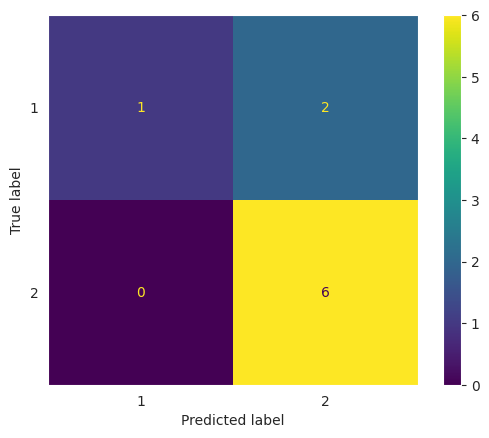

Sensitivity: 0.3333333333333333
Specificity: 0.3333333333333333
Precision: 1.0
F1 Score: 0.5
Balanced Accuracy: 0.6666666666666666


In [14]:
important_metrics(dt_classifier, X_test, Y_test)

[Text(0.4, 0.8333333333333334, 'x[3] <= -0.12\ngini = 0.491\nsamples = 23\nvalue = [10.0, 13.0]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 0.277\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

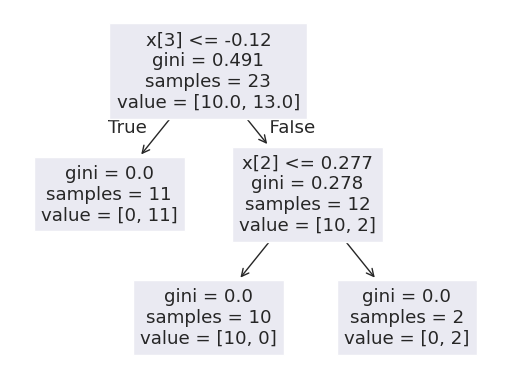

In [15]:
plot_tree(dt_classifier)

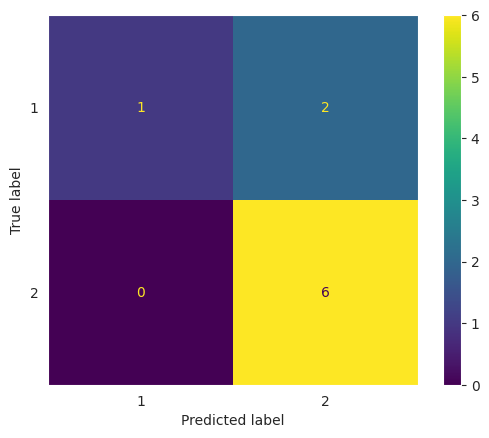

Grid Search Best Params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Grid Search Best Score: 0.82
Grid Search Metrics: {'sensitivity': 0.3333333333333333, 'specificity': np.float64(0.3333333333333333), 'precision': 1.0, 'f1_score': 0.5, 'balanced_accuracy': np.float64(0.6666666666666666)}


In [16]:
best_params_grid, best_score_grid, metrics_grid = grid_search_optimization(X_training, X_test, Y_training, Y_test)
print("Grid Search Best Params:", best_params_grid)
print("Grid Search Best Score:", best_score_grid)
print("Grid Search Metrics:", metrics_grid)


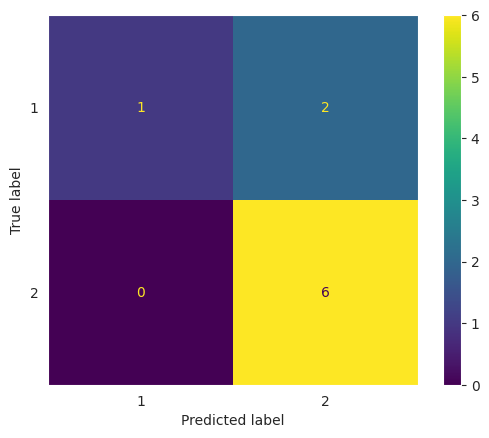

Random Search Best Params: {'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 7, 'criterion': 'entropy'}
Random Search Best Score: 0.82
Random Search Metrics: {'sensitivity': 0.3333333333333333, 'specificity': np.float64(0.3333333333333333), 'precision': 1.0, 'f1_score': 0.5, 'balanced_accuracy': np.float64(0.6666666666666666)}


In [17]:
best_params_random, best_score_random, metrics_random = random_search_optimization(X_training, X_test, Y_training, Y_test)
print("Random Search Best Params:", best_params_random)
print("Random Search Best Score:", best_score_random)
print("Random Search Metrics:", metrics_random)

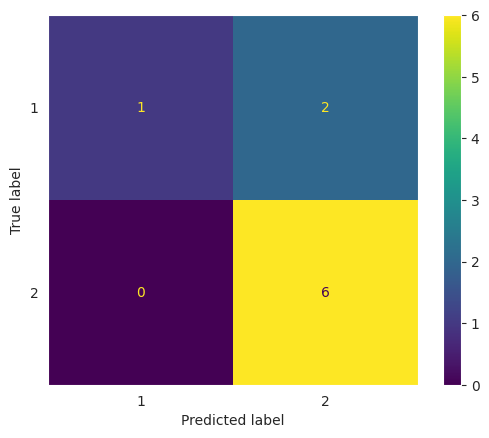

Bayesian Optimization Best Params: OrderedDict({'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5})
Bayesian Optimization Best Score: 0.82
Bayesian Optimization Metrics: {'sensitivity': 0.3333333333333333, 'specificity': np.float64(0.3333333333333333), 'precision': 1.0, 'f1_score': 0.5, 'balanced_accuracy': np.float64(0.6666666666666666)}


In [20]:
best_params_bayes, best_score_bayes, metrics_bayes = bayesian_optimization(X_training, X_test, Y_training, Y_test)
print("Bayesian Optimization Best Params:", best_params_bayes)
print("Bayesian Optimization Best Score:", best_score_bayes)
print("Bayesian Optimization Metrics:", metrics_bayes)

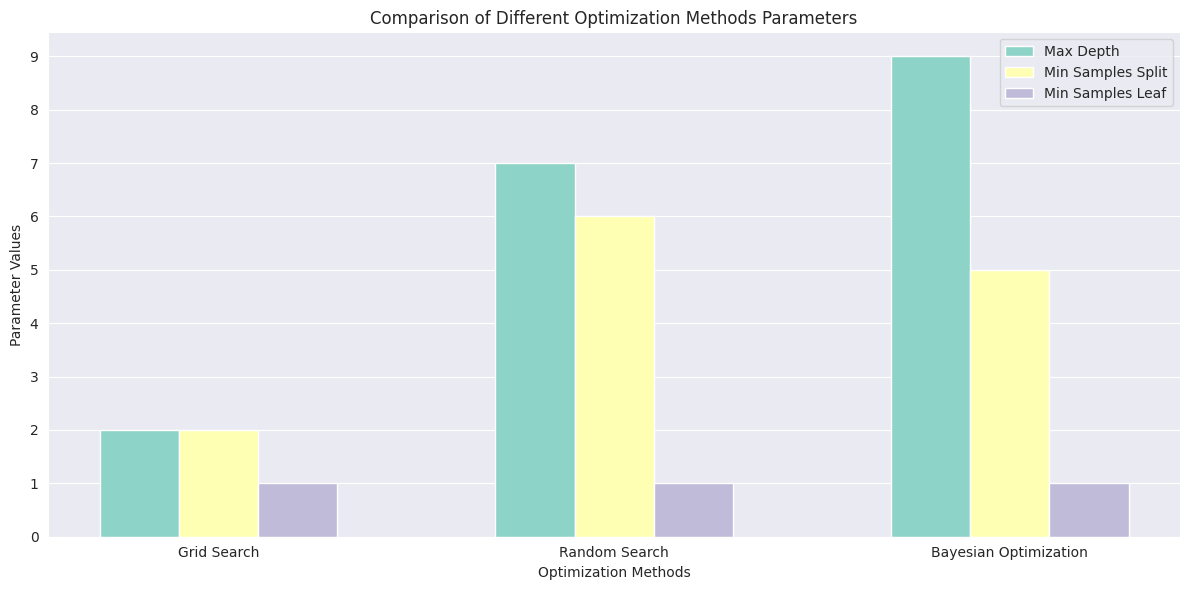

In [21]:
# Prepare data for plotting
methods = ['Grid Search', 'Random Search', 'Bayesian Optimization']
max_depth = [best_params_grid['max_depth'], best_params_random['max_depth'], best_params_bayes['max_depth']]
min_samples_split = [best_params_grid['min_samples_split'], best_params_random['min_samples_split'], best_params_bayes['min_samples_split']]
min_samples_leaf = [best_params_grid['min_samples_leaf'], best_params_random['min_samples_leaf'], best_params_bayes['min_samples_leaf']]

# Plotting
x = np.arange(len(methods))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, max_depth, width, label='Max Depth')
rects2 = ax.bar(x, min_samples_split, width, label='Min Samples Split')
rects3 = ax.bar(x + width, min_samples_leaf, width, label='Min Samples Leaf')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Optimization Methods')
ax.set_ylabel('Parameter Values')
ax.set_title('Comparison of Different Optimization Methods Parameters')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()
ax.set_yticks(np.arange(0, max(max_depth + min_samples_split + min_samples_leaf) + 1, 1))
ax.yaxis.grid(True)

fig.tight_layout()

plt.show()


Wybrałem trzy różne metody optymalizacji:
- Grid search
- Random search
- Bayesian optimization

2 pierwsze ze względu na to, że ich implementacja była najprostsza. 3. z powodu, że metoda grid search przeszukuje po wszystkich parametrach. W tym przypadku użycie jakiejkolwiek innej metody byłoby bez sensu. Dla przykładu jednak skupię się tylko na random search oraz bayesian optimization. Grid search zostawię jako referencję.

Optymalizacja trzema różnymi sposobami zwraca różne hiperparametry. Mimo tego predykcje modelu a tym samym metryki są takie same. Random search trwał najkrócej, bo 1.5 sekundy. Bayesian optimization trwał znacznie dłużej, bo 3 minuty i 47 sekund. Jest to dłużej nawet niż grid search, który trwał 22.5 sekundy. W tym przypadku nasz zbiór do przeszukiwania był relatywnie mały. Jednak jeśli zbiór byłby większy lub nauka modelu trwałaby dłużej to mogłoby się okazać, że random search poradziłby sobie gorzej i nie znalazłby najlepszego rozwiązania oraz że bayesian optimization trwałby krócej od grid search.